### Load the data

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data = data.drop(columns='Unnamed: 6')

### Create label data

In [2]:
y = data['Purchase'].to_numpy()
x = data.drop(['Purchase', 'SUS'], axis=1).to_numpy()
x

array([[254,   0,   3,   2],
       [247,   0,   6,   9],
       [125,   1,   6,   8],
       [ 22,   0,  11,   7],
       [262,   0,   2,   3],
       [113,   1,   8,   9],
       [ 91,   1,   6,   3],
       [ 46,   0,   6,  11],
       [132,   0,   9,   9],
       [190,   0,  11,   4],
       [146,   0,   9,   7],
       [226,   0,   4,   4],
       [ 54,   1,   7,   9],
       [104,   0,   2,   3],
       [292,   0,   7,   3],
       [126,   0,   8,   9],
       [152,   1,   3,   5],
       [221,   0,   3,   4],
       [ 51,   0,   9,   9],
       [230,   0,   6,   8],
       [ 72,   1,   6,   8],
       [284,   0,   6,  11],
       [168,   0,   2,   4],
       [194,   0,   1,   3],
       [130,   1,  10,   1],
       [227,   0,   9,   3],
       [161,   1,   7,   8],
       [262,   1,   2,   3],
       [257,   1,   9,  11],
       [ 57,   1,   8,   3],
       [138,   0,   8,   9],
       [ 33,   1,   9,   4],
       [260,   0,   1,   2],
       [178,   1,   3,   4],
       [153,  

### View Data Distribution

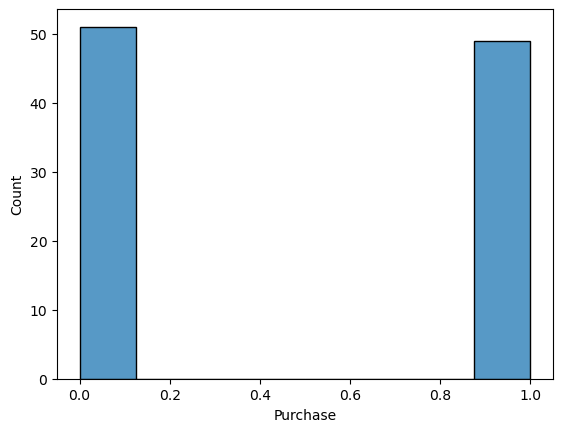

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data['Purchase'])
plt.show()

### Scale and Split

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.3)

array([[ 1.02926748, -0.85096294, -0.7083478 , -1.09353868],
       [ 0.95674737, -0.85096294,  0.09659288,  1.11244713],
       [-0.30717444,  1.1751393 ,  0.09659288,  0.7973063 ],
       [-1.37425597, -0.85096294,  1.43816069,  0.48216547],
       [ 1.1121476 , -0.85096294, -0.97666136, -0.77839785],
       [-0.43149462,  1.1751393 ,  0.63322   ,  1.11244713],
       [-0.65941495,  1.1751393 ,  0.09659288, -0.77839785],
       [-1.12561562, -0.85096294,  0.09659288,  1.74272878],
       [-0.23465434, -0.85096294,  0.90153357,  1.11244713],
       [ 0.36622653, -0.85096294,  1.43816069, -0.46325702],
       [-0.08961413, -0.85096294,  0.90153357,  0.48216547],
       [ 0.73918706, -0.85096294, -0.44003424, -0.46325702],
       [-1.0427355 ,  1.1751393 ,  0.36490644,  1.11244713],
       [-0.52473475, -0.85096294, -0.97666136, -0.77839785],
       [ 1.42294804, -0.85096294,  0.36490644, -0.77839785],
       [-0.29681443, -0.85096294,  0.63322   ,  1.11244713],
       [-0.02745404,  1.

### Build models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

### Train

In [6]:
lc.fit(x_train, y_train)
svc.fit(x_train, y_train)
nbc.fit(x_train, y_train)
rfc.fit(x_train, y_train)

RandomForestClassifier()

### Test

In [7]:
y_lc_predicted = lc.predict(x_test)
y_lc_pred_proba = lc.predict_proba(x_test)

y_svc_predicted = svc.predict(x_test)
y_svc_pred_proba = svc.predict_proba(x_test)

y_nbc_predicted = nbc.predict(x_test)
y_nbc_pred_proba = nbc.predict_proba(x_test)

y_rfc_predicted = rfc.predict(x_test)
y_rfc_pred_proba = rfc.predict_proba(x_test)

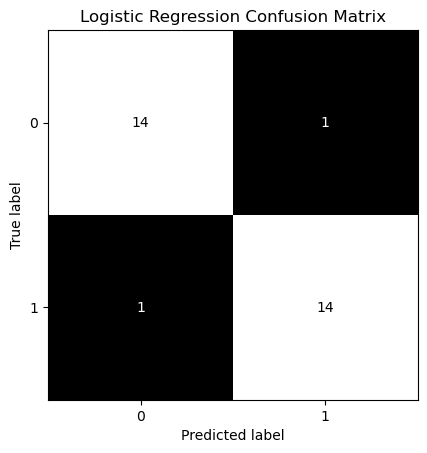

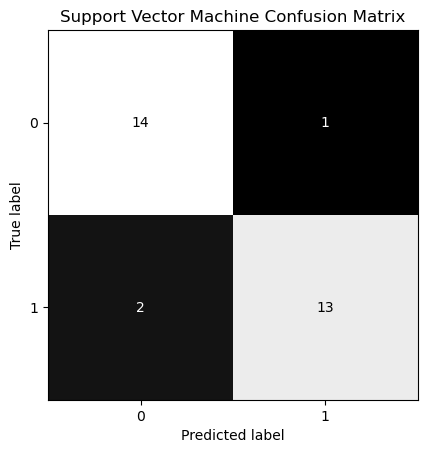

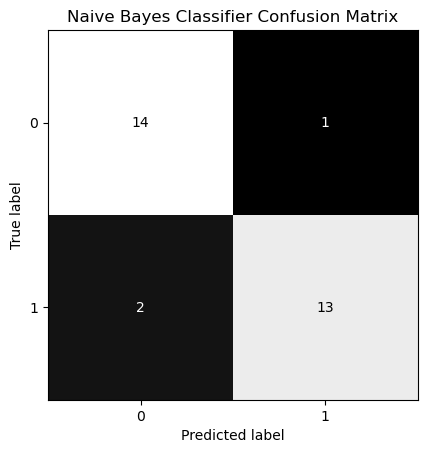

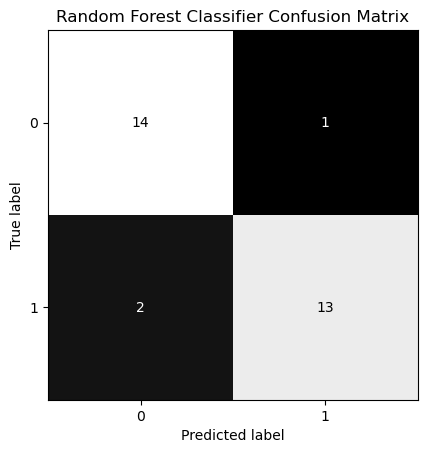

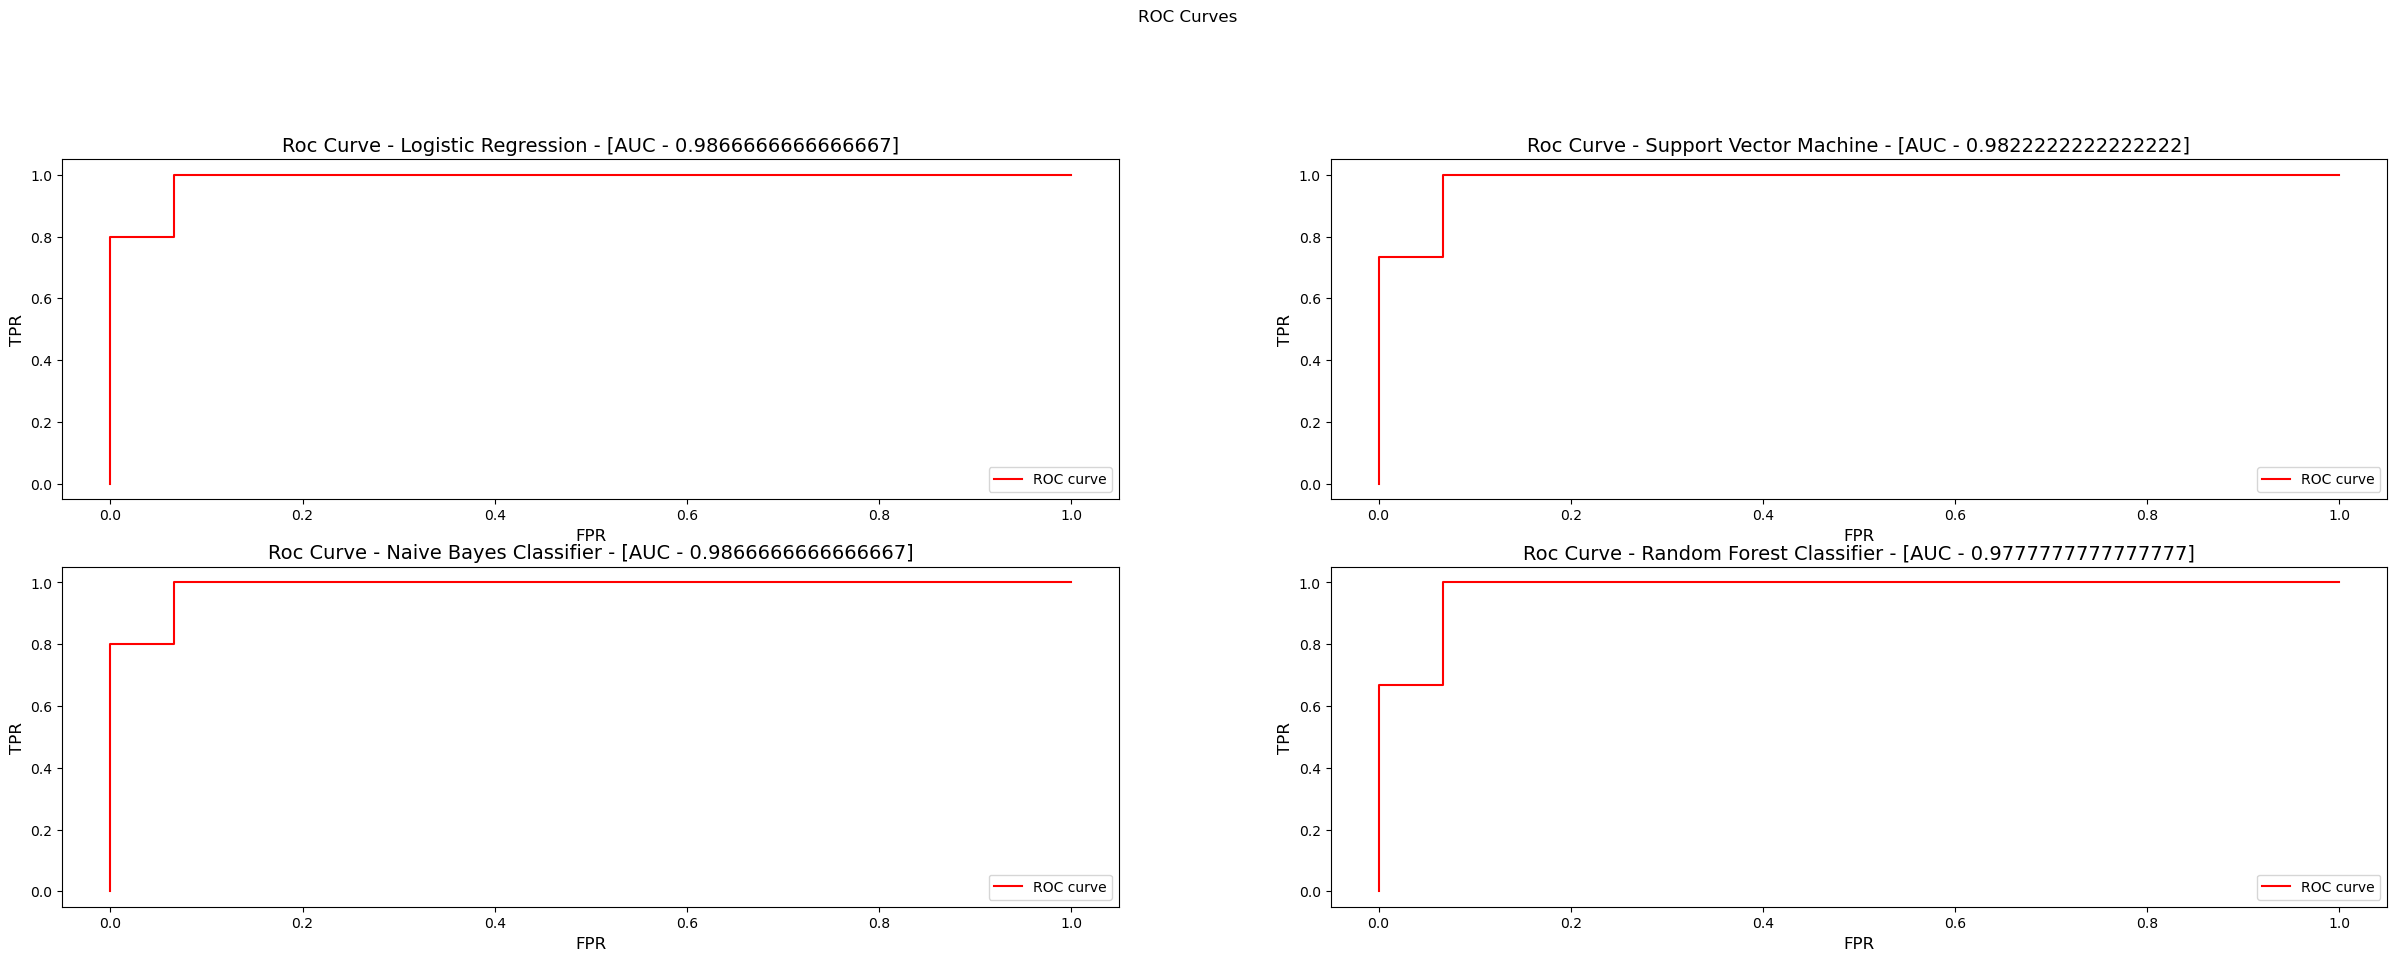

In [8]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()